# Project Booktrends: The first quarter of the 21st century(*)

## 0. Abstract
In this project we will analyze the top 50(**) bestsellers on Amazon from the years 2000 to 2024 to answer the following questions:

1. Fiction vs. Non-Fiction: Which Genre Dominates the Bestseller List?
3. The Cost of Reading: Are Bestsellers Getting Pricier?
4. Fame vs. Prestige: Do Award-Winning Books Sell?
5. The Returning Champ: Which books have stayed in the ring the longest?

(*) The first quarter of the 21st century is defined as the years 2000 to 2024, so not 2025, that wouldn't be possible time-wise. 

(**) The number of bestsellers are for some years only up to 48 or 49, because of the data from Amazon. Top 50 bestsellers do however sound better than top 48 or 49 bestsellers. Also, only 16 out of 1240 books are missing, so it's not a big deal. 

## 1. Introduction
I'm an avid reader of books, and lately I have  been curious about the trends in the book industry. With the rise of digital books and e-readers, the landscape of book publishing has changed significantly in the past two decades. In this project, I aim to analyze the trends in book publishing by examining the top 50 bestsellers on Amazon from the years 2000 to 2024. By analyzing the data, I hope to gain insights into the questions I raise in the abstract.  
I will mention it later as well, but I want to briefly say that I'm aware that Amazon is not the only place where people buy books, but it's the biggest online retailer of books, and I think it's a good place to start and to get a general idea of what people are reading. Amazon dominates the market ot only as an online retailer, but also as an owner of Kindle, the e-reader device, Goodreads, the social media platform for book lovers and Audible, the audiobook platform.

Also, I'm aware that the bestseller list is not the only way to measure the success of a book, but for me, it is enough with the time I have to work on this project.

It should be said however that my first idea for the project was to analyze movies from the last century up till recently, but I didn't find a good api/dataset for that. And it wasn't until I had started with this idea that I realized I could probably just scrape from IMdB. But I'm happy with this project as well, just probably not as happy.

## 2.0 Data Collection
When I started the project I wasn't a hundred percent sure on what I actually want in my final dataset, but I figured the title of the book was a good start. Then came the author, the rank, the year, the rating, the reviews and the price. Since one of my questions was about what genres people were reading, I did want to include that as well. Much later on in the project I also decided to include the awards the books had won, and formed a question around that as well. Okay, but how did I get the data?

Luckily, Amazon has a Top 100 bestseller list from the year 1995 up till now 2025, so it was fairly easy to navigate through the pages. The first hurdle I stumbled upon was how Amazon loads their pages, by lazy loading. It took some time to notice this because the page I used to learn their html-layout was a page I had already scrolled down all the way on, getting all the results for the page. The url I used was only getting the first 30 results, so I had to find a way to get the rest of the results. I found a way to do this by scrolling down the page with selenium, a python package that can control a web browser, in my case after loading the page scroll down until it hits the bottom of the page then gather the results. 

Good, so we have all the books and most of their attributes, but we are missing the genres. On Amazon some books occasionally have a genre tag, but most of them don't. So I decided to scrape Goodreads for the genres. It can't be that troublesome, can it? Well, it was, for me at least. A few problem arose from their less-than-optimal search system.

1. Some books had multiple copies with the same name, but often just knockoffs or different version of that book, usually with zero reviews and no genre-tags. 
2. Some books had the same name, but were different books, and the one I was looking for was not the first one in the search results.
3. For some reason the title of the book was not always the same on Amazon as on Goodreads, so I had to do some cleaning of the titles before searching for them on Goodreads.
4. When searching for the book on Goodreads, sometimes the full title wouldn't give me any results, or if it did, it was not the book I was looking for.
5. Sometimes the author was a different person between the two sites, and sometimes the author was not even listed on Goodreads.

Well, that's great I thought to myself. Enter some odd packages I never heard of before, a probably faulty logic system and a lot of time spent on debugging, and I finally got the genres for most of the books. I reckoned since they all are in some shape of form bestsellers, they should have at least a few reviews on Goodreads, and valued high number of reviews over almost everything else.

The way it all works is that I first search for the book on Goodreads, grab all results above a certain threshold, 20 reviews in this case. I could lower this number, but I didn't want to get too many false positives. I return a list with the number of searches that passed the first test, now I judge them by the title, the author and the number of reviews. If the title and author match, it gets highest priority. If the author is a fuzzy match, meaning it is close to the same, it gets second priority. If it is no match at all, third priority. If there is no author on Goodreads, it gets fourth priority. I then calculate a score like this:  "score = -priority * 1000 + result_data["rating_count"] + title_match_score" and choose the book that gets the highest score. I could get into more detail but the word limit is approaching.

The awards I searched for with Google and simply filled in some csv files manually, not a lot of logic or debugging there.


### 2.1 Data Cleaning
Not alot of cleaning was done, the few missing datas I left as is because it didn't hinder the analysis by much. I did clean the titles while searching for the genres on Goodreads, but that was more of a necessity than a cleaning. I did however normalize the titles for the awards, and the genres, so that they would match up better.

## 3.0 Data Analysis
I will start by answering the questions I posed in the abstract, but not too deeply because I don't want to make any false claims or far-fetched conclusions based on the data I have.
It's the classic case of correlation does not imply causation, and I don't want to make any claims that are not backed up by the data. I will however make some assumptions and try to explain them as best as I can. Altough buying books from Amazon is one of the most common ways of buying books, the trends shown here does not necessarily reflect the trends in the book industry as a whole.

### 3.1 Fiction vs. Non-Fiction: Which Genre Dominates the Bestseller List?
From the data I gathered, I can see how many spots on the top 50 bestsellers each year belong to fiction and how many go to nonfiction. Some years, fiction takes up the lion’s share—maybe because a few big novels blow up and take over. Other times, nonfiction holds more slots. While I can’t track how long individual titles stay popular just from these yearly snapshots, it’s clear that the balance between fiction and nonfiction shifts from year to year, reflecting whatever readers happen to be most curious about at the time.

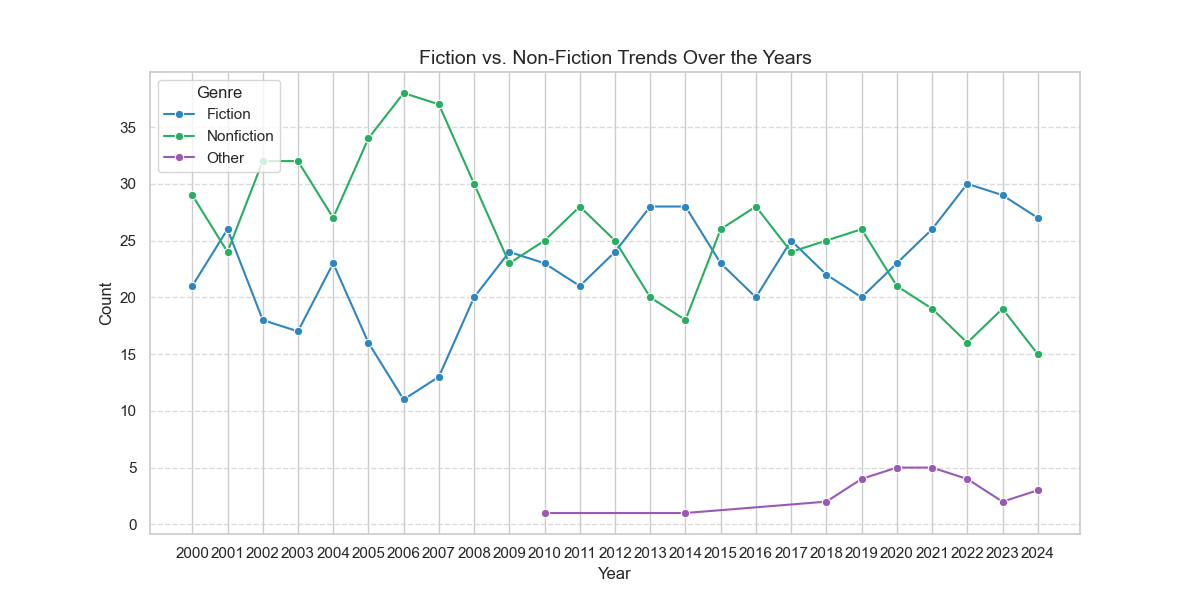

In [46]:
from IPython.display import Image, display
import pandas as pd
books_df = pd.read_csv("saved_datasets/amazon_bestsellers_with_awards.csv")
display(Image(filename="plots/3_1_genre_trends.png"))

books_df.to_csv("saved_datasets/amazon_bestsellers_with_awards.csv", index=False)



### 3.2 The Cost of Reading: Are Bestsellers Getting Pricier?

The average price of the top 50 bestsellers has stayed relatively stable over the years, with a slight decrease in price the last few years. I was intrigued on why that is, and I thought it could be because maybe other formats of books have become more popular, compared to the most expensive covers usually being hardcovers.
So I made a new plot, showing the proportions of the different covers, and it seems that the proportion of hardcovers has decreased the last few years, and the proportion of paperbacks has increased. This could be a reason for the decrease in price, since paperbacks are on average cheaper than hardcovers. What we can see from the plot is an increase of boardbooks and paperbacks, both cheaper than hardcovers, and from that one could assume that the average price of the top 50 bestsellers has decreased because of the increase in cheaper covers.

If we especially look at the boardbook cover, often if not always used for children's books, we can see that it increased in proportion  around 2013 and has increased since then.


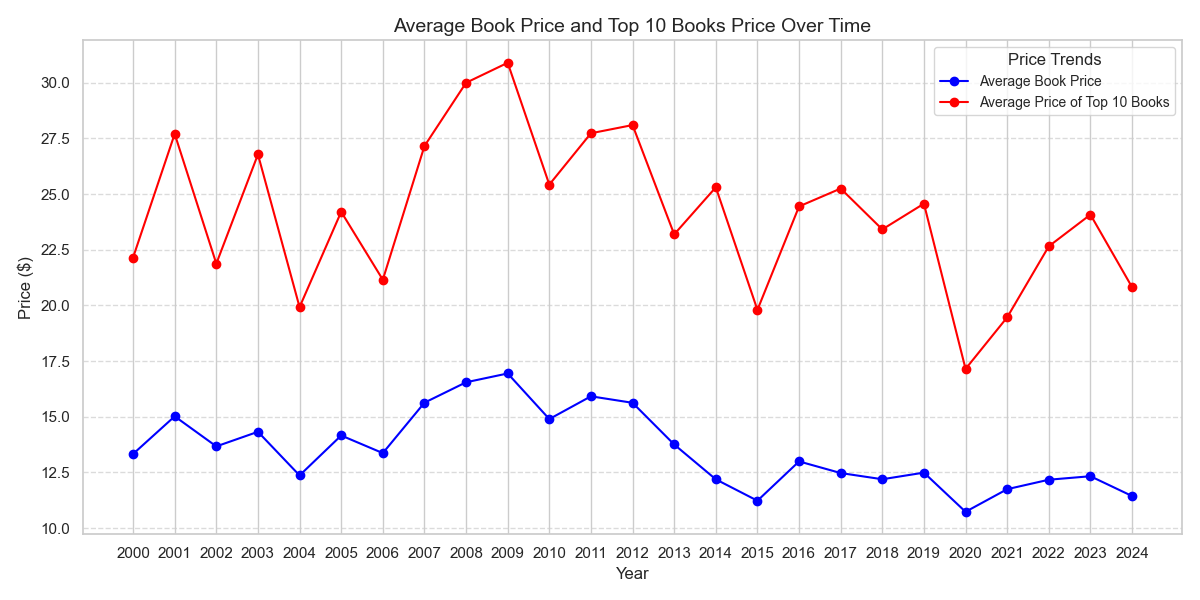

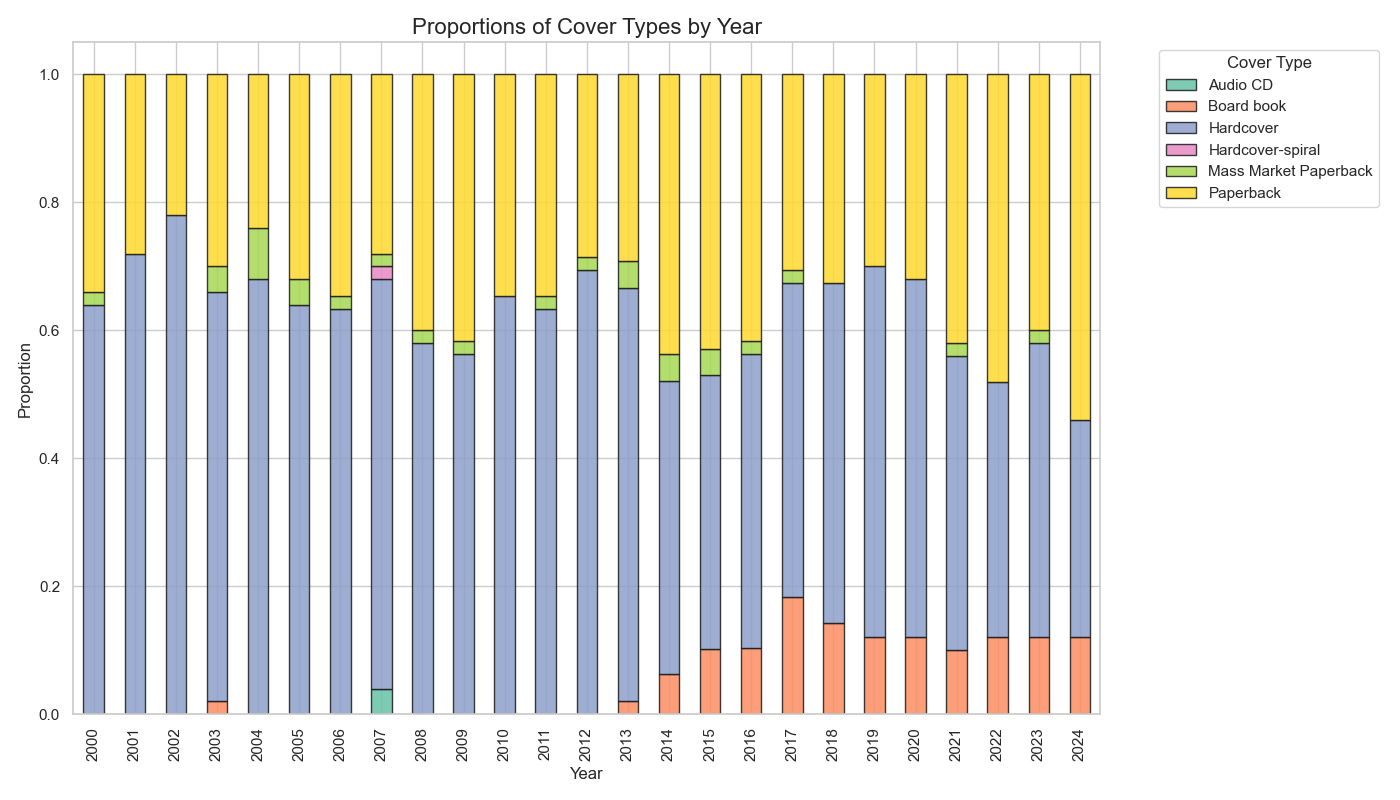

Cover
Audio CD                 44.535000
Hardcover                15.566719
Hardcover-spiral         13.400000
Mass Market Paperback    11.373200
Paperback                11.168088
Board book                6.537121
Name: Price, dtype: float64

In [51]:
display(Image(filename="plots/combined_price_trends.png"))
display(Image(filename="plots/3_2_cover_proportions.png"))
books_df.groupby("Cover")["Price"].mean().sort_values(ascending=False)

### 3.3 Fame vs. Prestige: Do Award-Winning Books Sell?
To some of my surprise there were only 8 unique books that have won an award, guess there is no accounting for taste.

Jokes aside, it would have been interesting to see if there were any trends related when a book wins an award, but there is not enough data to make any sort of conclusion. For example, some book award winners get announced close to the end of the year, so I would have hoped to see a spike in sales the following year. Compared to if a book wins an award in the beginning of the year, I would have hoped to see a spike in sales the same year.

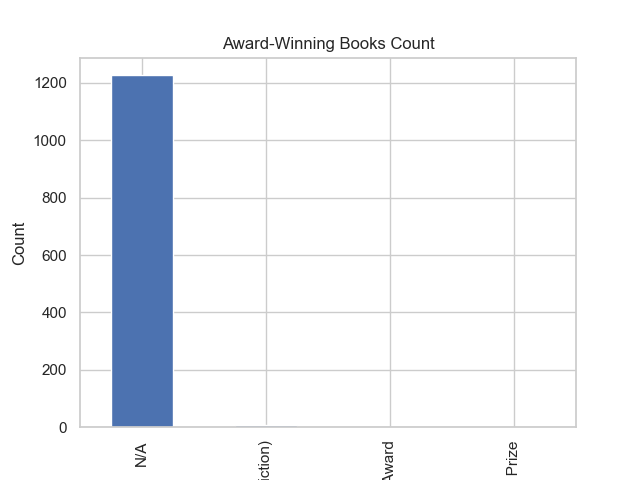

,Title,Author,Year,Rank,Matching_Award
0,Harry Potter and the Goblet of Fire (Harry Pot...,J.K. Rowling,2001,8,Hugo Award
1,Empire Falls,Richard Russo,2002,49,Pulitzer Prize (Fiction)
2,The Road (Oprah's Book Club),Cormac McCarthy,2007,16,Pulitzer Prize (Fiction)
3,Olive Kitteridge,Elizabeth Strout,2009,32,Pulitzer Prize (Fiction)
4,The Goldfinch: A Novel (Pulitzer Prize for Fic...,Donna Tartt,2014,21,Pulitzer Prize (Fiction)
5,All the Light We Cannot See,Anthony Doerr,2015,8,Pulitzer Prize (Fiction)
6,Demon Copperhead: A Novel,Barbara Kingsolver,2023,20,Pulitzer Prize (Fiction)
7,Life of Pi,Yann Martel,2002,38,Booker Prize


In [48]:
from IPython.display import display, Image

# Display the plots
display(Image("plots/3_3_award_counts.png"))

# Initialize an empty DataFrame to store all books with awards
books_with_awards_df = pd.DataFrame()

award_names = [
    "Hugo Award",
    "Nebula Award",
    "Pulitzer Prize (Fiction)",
    "Pulitzer Prize (Non-Fiction)",
    "Booker Prize",
]

# Loop through each award and append matching books to the DataFrame
for award in award_names:
    # Use regex=False to avoid interpreting the award name as a regex pattern
    filtered_books = books_df[books_df["Award"].str.contains(award, na=False, regex=False)].copy()
    filtered_books["Matching_Award"] = award  # Add a column to indicate the award
    books_with_awards_df = pd.concat([books_with_awards_df, filtered_books], ignore_index=True)

# Display the consolidated table
if not books_with_awards_df.empty:
    display(books_with_awards_df[["Title", "Author", "Year", "Rank", "Matching_Award"]])
else:
    print("No books with specified awards found.")


### 3.4 The Returning Champ: Which books have stayed in the ring the longest?

Out of the top 10 most repeated books, 8 of them are self-help books. The other two are children's books.
It does make sense that self-help books are the most repeated books, since one of the primary reasons self-help books tend to show up repeatedly on bestseller lists is their “evergreen” nature. Unlike many fiction titles that may enjoy a peak of popularity tied to a new release or a film adaptation, self-help books often address timeless personal development needs (motivation, time management, mental health, productivity). This makes them consistently relevant to new readers year after year.
Personal growth is a growing industry, and it's not hard to see why. The world is changing rapidly and people are looking for ways to keep up.

Also, the children's books are classics so it makes sense that they are on the list as well.

In [23]:
repeated_titles = books_df[books_df["Title"].duplicated(keep=False)]
# Group by Title and calculate the necessary metrics
aggregated_data = (
    repeated_titles.groupby("Title")
    .agg(
        Count=("Title", "size"),  # Count of occurrences
        Avg_Rank=("Rank", "mean"),  # Average rank
        Main_Genre=("Genre", lambda x: x.mode().iloc[0] if not x.mode().empty else "N/A"),  # Most frequent genre
    )
    .sort_values(by="Count", ascending=False)  # Sort by Count
    .reset_index()
)

# Select the top 50 repeated books
top_repeated_books_with_metrics = aggregated_data.head(10)

# Display the result
from IPython.display import display
display(top_repeated_books_with_metrics)

,Title,Count,Avg_Rank,Main_Genre
0,The Four Agreements: A Practical Guide to Pers...,14,21.714286,Nonfiction
1,"Oh, the Places You'll Go!",12,23.416667,Fiction
2,The Very Hungry Caterpillar,12,26.083333,Fiction
3,Good to Great: Why Some Companies Make the Lea...,12,17.750000,Nonfiction
4,The 7 Habits of Highly Effective People: Power...,11,33.181818,Nonfiction
5,StrengthsFinder 2.0,11,6.727273,Nonfiction
6,The Five Dysfunctions of a Team: A Leadership ...,11,25.090909,Nonfiction
7,Who Moved My Cheese,9,16.555556,Nonfiction
8,The 5 Love Languages: The Secret to Love that ...,8,20.500000,Nonfiction
9,"Now, Discover Your Strengths: The revolutionar...",8,12.625000,Nonfiction


## 4. Conclusion
In this project, I analyzed the top 50(*) bestsellers on Amazon from the years 2000 to 2024 to answer the questions I posed in the abstract. Here are the key findings:

1. Fiction vs. Non-Fiction: It's been a fairly even battle recently but in the early 2000s non-fiction was the clear winner. What I found interesting was that the latest years fiction has started gaining rank and is now above non-fiction
2. The average cost of the top 50 bestsellers has stayed relatively stable over the years, with a slight decrease in price the last few years. In the top 10 of each year, we first  see a strong increase in the average price, close to twice the average price of the top 50. It has have had a bit more turbulent journey, but it has also decreased in price the last few years.
3. Fame vs. Prestige: Only 8 unique books have won an award, and they have not sold particularly well in relative to the other books on the list. The average rank of the books that have won an award is 27.42, which is higher than what the average book has. Quite odd I think.
4. The Returning Champ: The top 10 most repeated books are mostly self-help books, with two children's books sprinkled in. The most repeated book is "The Four Agreements: A Practical Guide to Personal Freedom" by Don Miguel Ruiz, which has appeared a whopping 14 times on the bestseller list, closely followed by a three-way tie between "Oh, the Places You'll Go!", "The Very Hungry Caterpillar", and "The 7 Habits of Highly Effective People". That being said, the one book that sticks out to me the most is "StrengthsFinder 2.0" by Tom Rath, which has appeared 11 times on the bestseller list. It's a self-help book that focuses on identifying and developing your strengths, and it seems to have resonated with readers over the years since its average rank is 6.73. 

There are a lot of things I could have done different, or better if I could do it again, but I'm fairly happy with my findings. I think I could have just done Top 100 instead, gotten some more data, maybe compared what differentiates the top 50 with the top 51-100. 
It was interesting seeing fiction gain a bigger share of list, and what kind of fiction it was. I think maybe an influx from , as far as I know, the Booktok community have changed the landscape of what people are reading.
One thing I would have liked to look into more is the sales volumes, but I'm not sure where I can get that data from. Amongst other things, given unlimited time I could have done more deep dives. Alas, I'm happy with what I have done, and I hope you have enjoyed reading this blog post.